# 1. Import Libraries

In [84]:
# data management libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import style

import pingouin as pg
import statsmodels.api as sm
from scipy import stats

#always :)
style.use("dark_background") 

# 2. Read Data 

In [85]:
df = pd.read_csv('data/laptopPrice.csv')
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [86]:
# check for missing values
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

# 3. EDA

**Features:** 
- **brand:**   
    Brand name of the laptop manufacturer
- **processor_brand:**   
    Brand name of the laptop's cpu manufacturer
- **processor_name:** 
    CPU model name
- **processor_gnrtn:** 
    CPU generation
- **ram_gb:**
- **ram_type**           
- **ssd**                
- **hdd**                
- **os**                 
- **os_bit**             
- **graphic_card_gb**    
- **weight**             
- **warranty**           
- **Touchscreen**        
- **msoffice**           
- **rating**             
- **Number of Ratings**  
- **Number of Reviews**  
- **Price:**     
    The target value.

In [87]:
#show the data types of each column
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

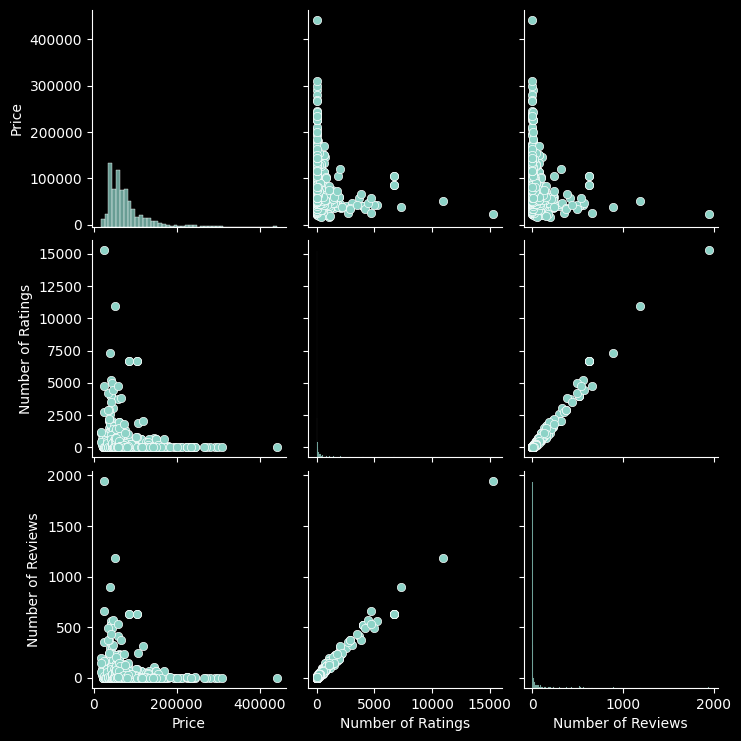

In [88]:
sns.pairplot(df)
plt.show()

## 3.1. Preprocessing

In [89]:
# Drop the number of reviews, since is it is almost 1-1 related to the number of ratings
df = df.drop(columns=['Number of Reviews'])

In [90]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, " unique values: ",df[col].unique())

brand  unique values:  ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
processor_brand  unique values:  ['Intel' 'AMD' 'M1']
processor_name  unique values:  ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
processor_gnrtn  unique values:  ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
ram_gb  unique values:  ['4 GB' '8 GB' '16 GB' '32 GB']
ram_type  unique values:  ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
ssd  unique values:  ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
hdd  unique values:  ['1024 GB' '0 GB' '512 GB' '2048 GB']
os  unique values:  ['Windows' 'DOS' 'Mac']
os_bit  unique values:  ['64-bit' '32-bit']
graphic_card_gb  unique values:  ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
weight  unique values:  ['Casual' 'ThinNlight' 'Gaming']
warranty  unique values:  ['No warranty' '1 year' '2 years' '3 years']
Touchscreen  unique values:  ['No' 'Yes']
msoffice  u

Removing outliers

In [91]:
initial_rows = df.shape[0]

In [92]:
# select numerical columns
numerical_columns = ['Price', 'Number of Ratings']

# remove outliers 
# checks if, for each row, all column values are within 3 standard deviations from the mean
df = df[(np.abs(stats.zscore(df[numerical_columns])) < 3).all(axis=1)]

In [93]:
print("Dropped rows: ", initial_rows - df.shape[0])

Dropped rows:  38


Encode categorical ordinal values 

In [94]:
#convert to int
df['ram_gb'] = df['ram_gb'].str.replace('GB','').astype(int)
df['ssd'] = df['ssd'].str.replace('GB','').astype(int)
df['hdd'] = df['hdd'].str.replace('GB','').astype(int)
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace('GB','').astype(int)
df['rating'] = df['rating'].str.replace('stars','').str.replace('star','').astype(int)
df['warranty'] = df['warranty'].str.replace('No warranty','0').str.replace('years','').str.replace('year','').astype(int)
df['os_bit'] = df['os_bit'].str.replace('-bit','').astype(int)
df['Touchscreen'] = df['Touchscreen'].str.replace('No','0').str.replace('Yes','1').astype(int)
df['msoffice'] = df['msoffice'].str.replace('No','0').str.replace('Yes','1').astype(int)

Encode categorical ordinal values 

In [95]:
cat_mappings = pd.DataFrame()

In [96]:
for col in df.columns:
    if df[col].dtype == 'object':
        #map the categorical values to numerical values
        #keep the mapping dictionary for future reference
        mapping_dict = {value: i for i, value in enumerate(df[col].unique())}
        cat_mappings[col+'_numeric'] = df[col].map(mapping_dict)
        cat_mappings[col] = df[col]
        #one hot encode the col
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=False)
        df = pd.concat([df, one_hot], axis=1)
        df = df.drop(columns=[col])
        #print the mapping dictionary
        print(f"Mapping for {col}: {mapping_dict}")


Mapping for brand: {'ASUS': 0, 'Lenovo': 1, 'acer': 2, 'Avita': 3, 'HP': 4, 'DELL': 5, 'MSI': 6, 'APPLE': 7}
Mapping for processor_brand: {'Intel': 0, 'AMD': 1, 'M1': 2}
Mapping for processor_name: {'Core i3': 0, 'Core i5': 1, 'Celeron Dual': 2, 'Ryzen 5': 3, 'Core i7': 4, 'Core i9': 5, 'M1': 6, 'Pentium Quad': 7, 'Ryzen 3': 8, 'Ryzen 7': 9, 'Ryzen 9': 10}
Mapping for processor_gnrtn: {'10th': 0, 'Not Available': 1, '11th': 2, '7th': 3, '8th': 4, '9th': 5, '4th': 6, '12th': 7}
Mapping for ram_type: {'DDR4': 0, 'LPDDR4': 1, 'LPDDR4X': 2, 'DDR3': 3, 'LPDDR3': 4, 'DDR5': 5}
Mapping for os: {'Windows': 0, 'DOS': 1, 'Mac': 2}
Mapping for weight: {'Casual': 0, 'ThinNlight': 1, 'Gaming': 2}


In [110]:
#get collumns to plot
numColsToPlot = ['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'warranty',
       'Touchscreen', 'msoffice', 'rating', 'Number of Ratings']
catColsToPlot = []
for col in cat_mappings.columns:
    if not col.endswith('_numeric'):
        catColsToPlot.append(col)

In [113]:
df_for_plot = pd.concat([df, cat_mappings], axis=1)

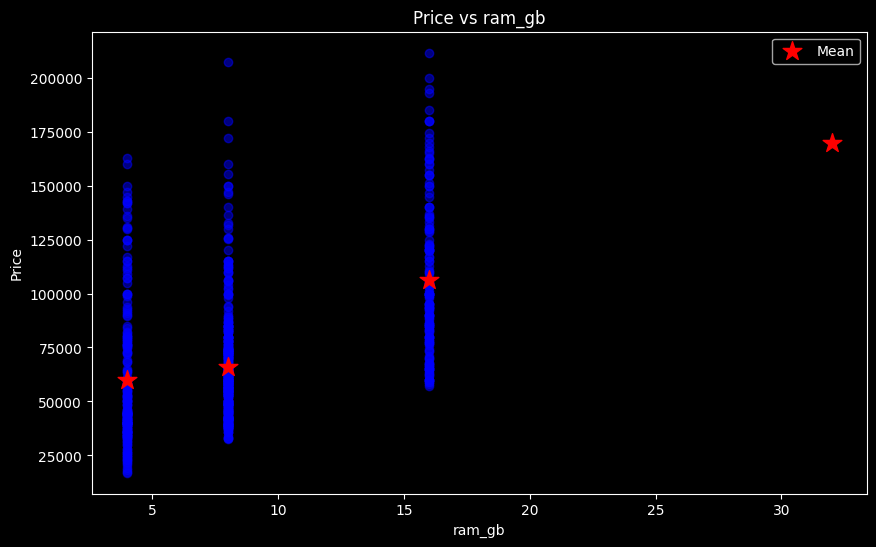

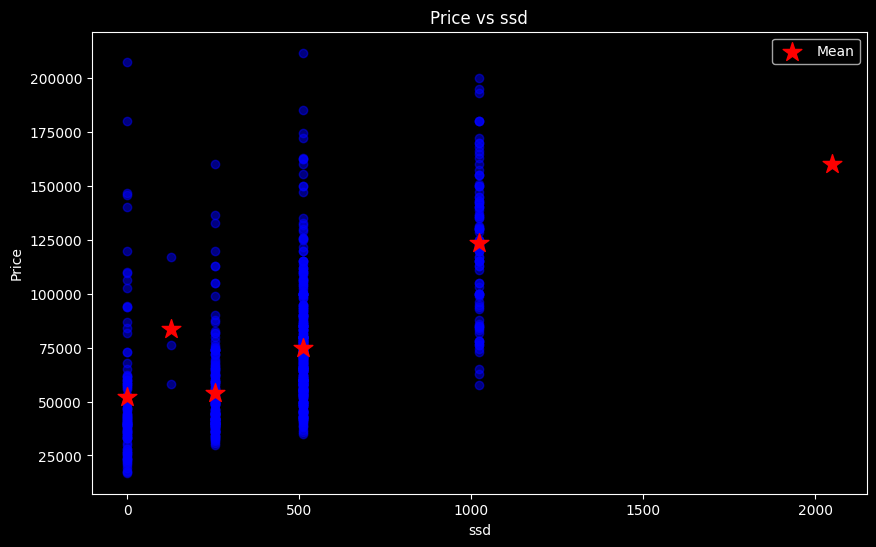

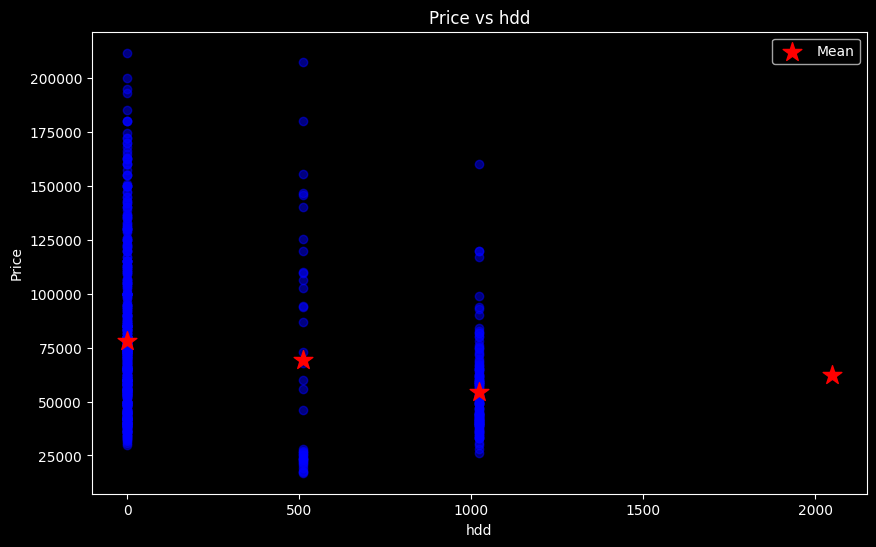

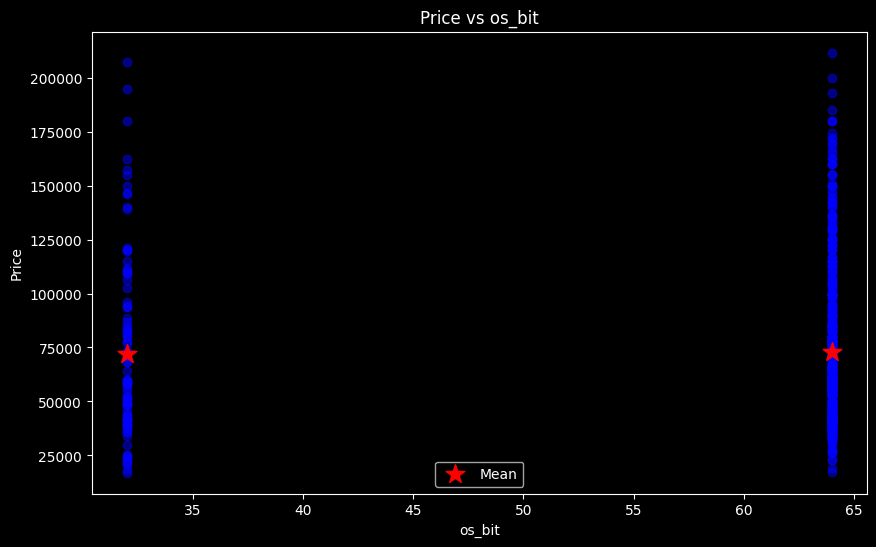

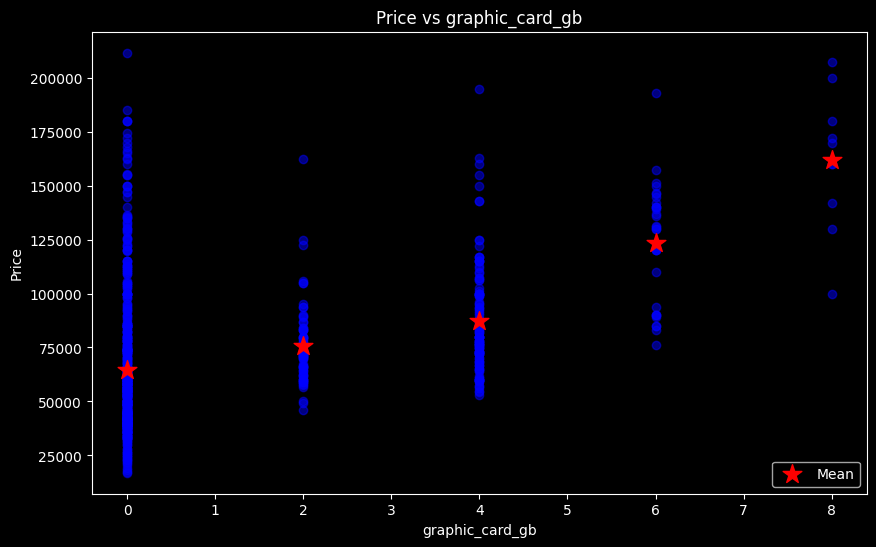

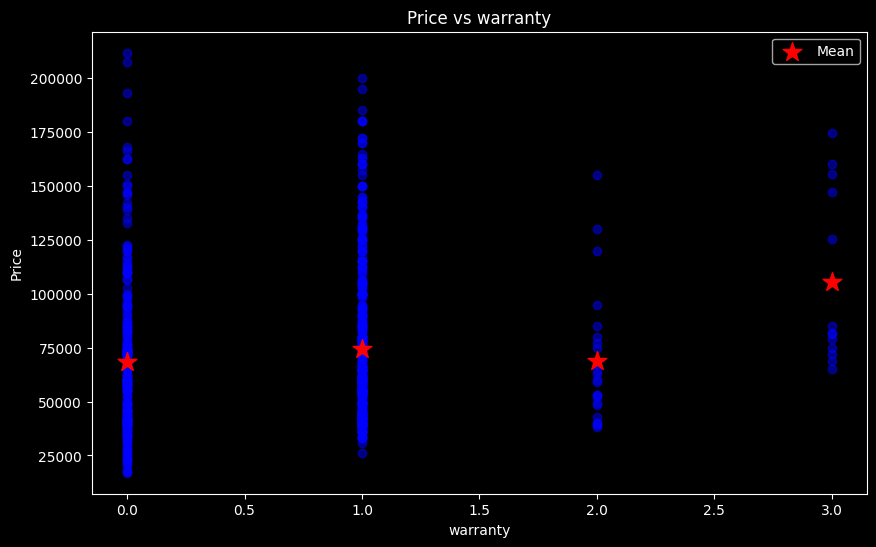

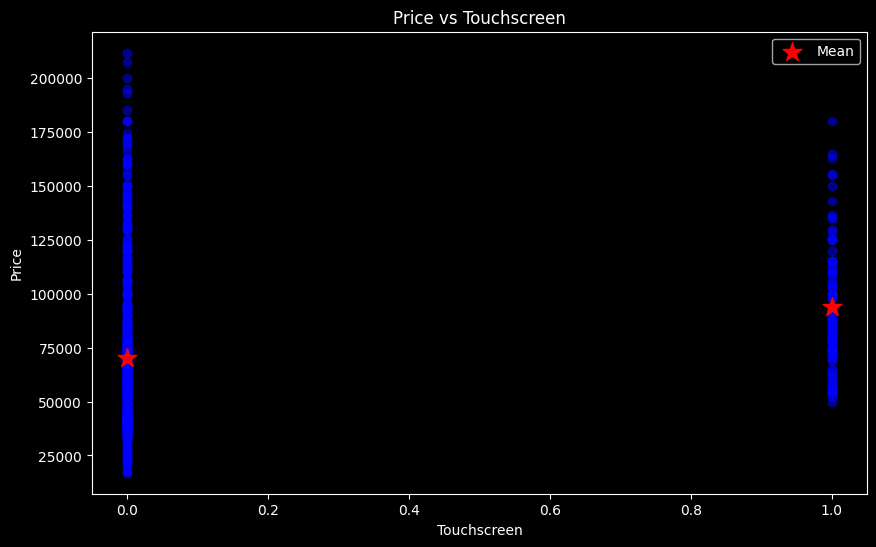

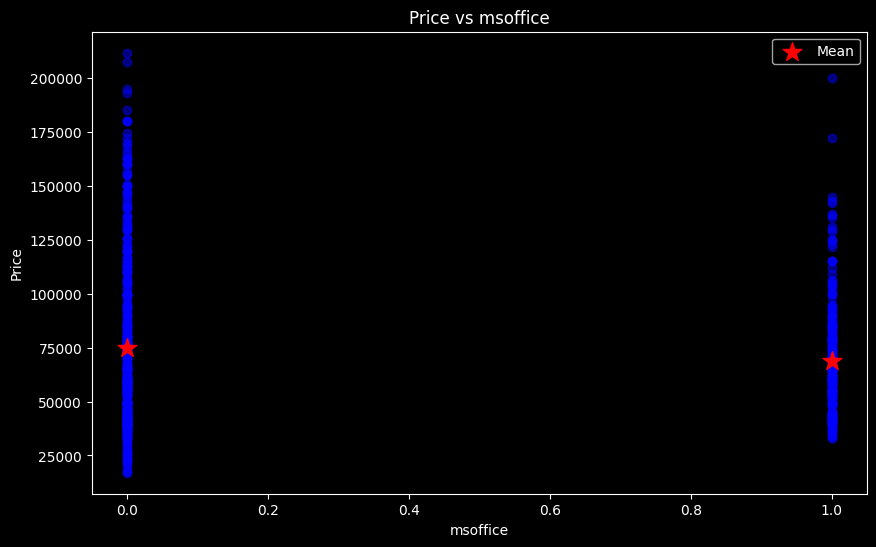

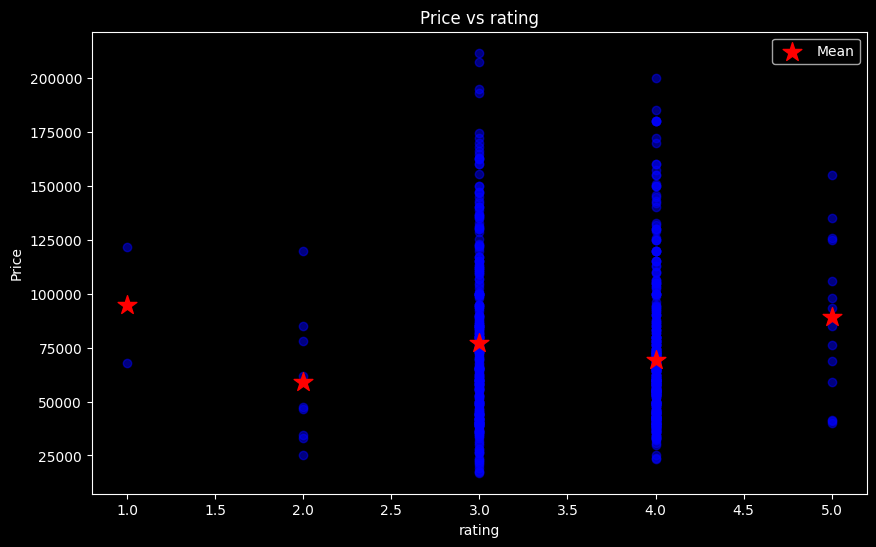

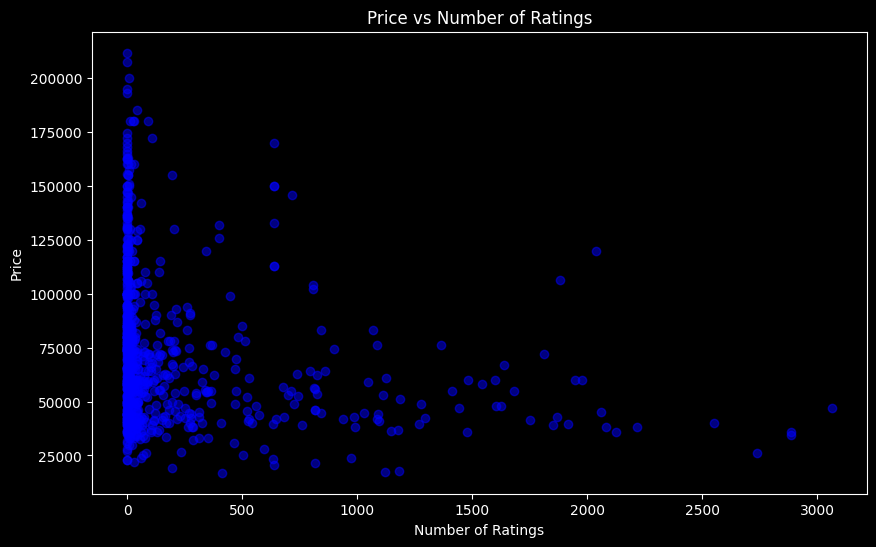

In [ ]:
for col in numColsToPlot:
    #scatter plot for each feature against the price
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col], df['Price'], alpha=0.5, color='blue')
    plt.xlabel(col)
    plt.ylabel('Price')

    if (df[col].unique().size < 30):
        grouped_means = df.groupby(col)['Price'].mean()
        for x_val, mean_price in grouped_means.items():
            #add mean also with different color
            plt.scatter(x_val, mean_price, color='red', marker='*', s=200, label='Mean' if x_val == grouped_means.index[0] else "")
        plt.legend()
        
    plt.title('Price vs ' + col)
    plt.show()


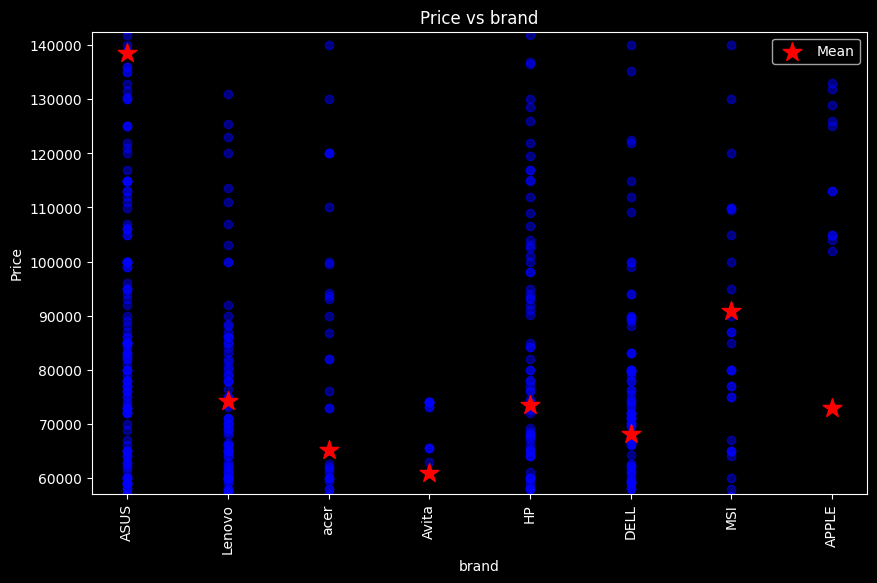

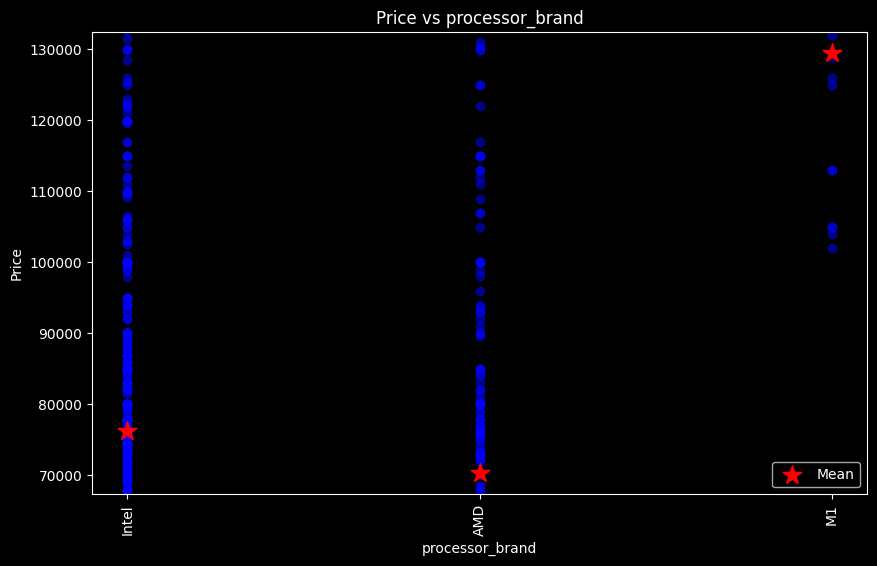

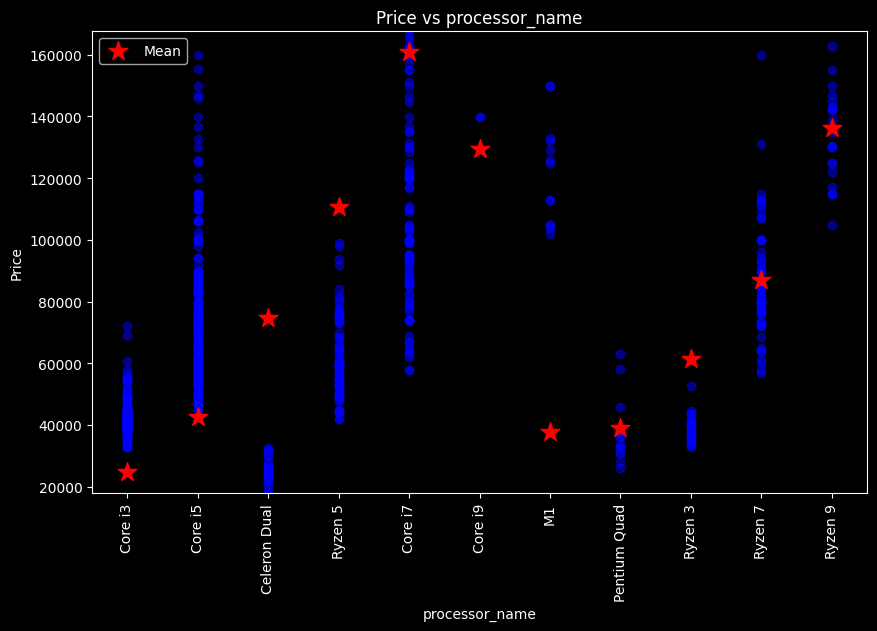

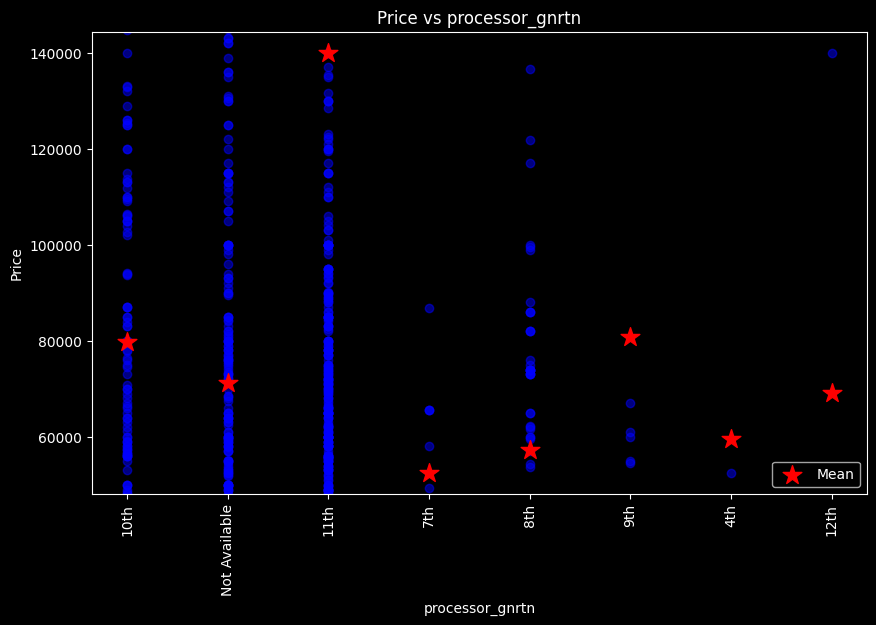

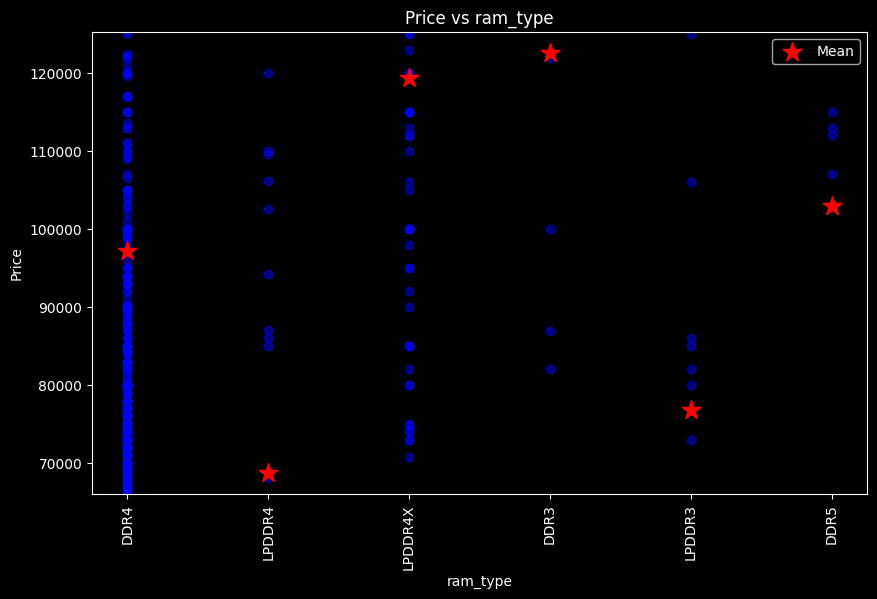

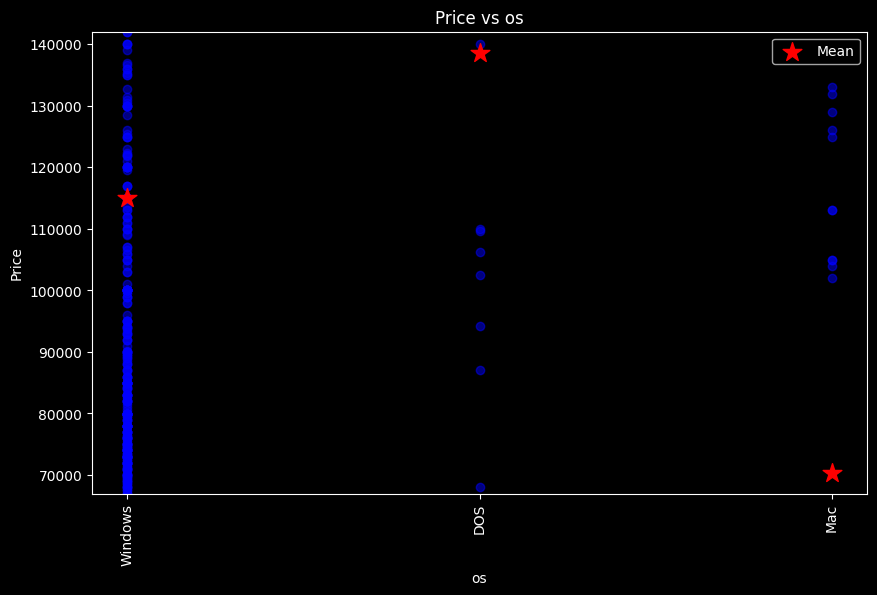

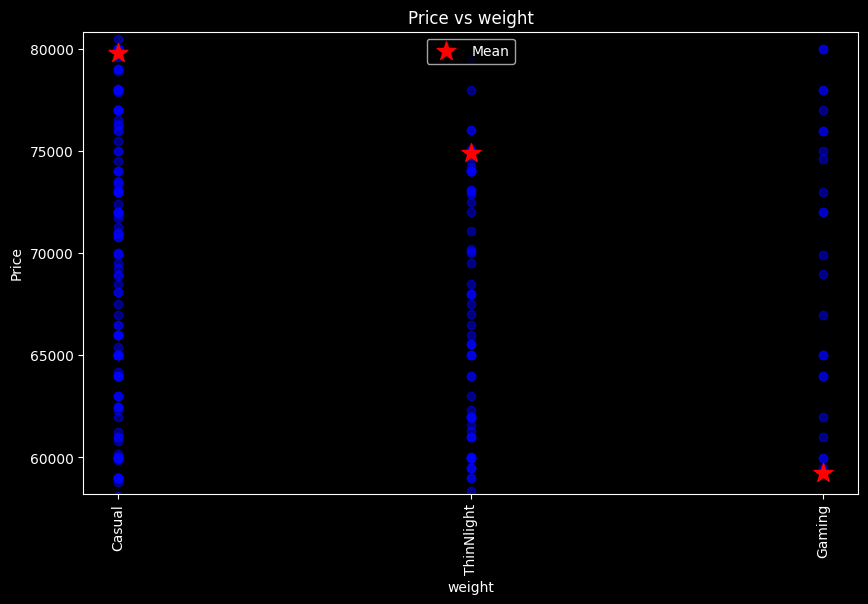

In [114]:
for col in catColsToPlot:
    #scatter plot for each feature against the price
    plt.figure(figsize=(10, 6))
    plt.scatter(df_for_plot[col+'_numeric'], df_for_plot['Price'], alpha=0.5, color='blue')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.xticks(df_for_plot[col+'_numeric'].unique(), df_for_plot[col].unique(), rotation=90)
    grouped_means = df_for_plot.groupby(col)['Price'].mean()
    for x_val, mean_price in grouped_means.items():
        #add mean also with different color
        plt.scatter(x_val, mean_price, color='red', marker='*', s=200, label='Mean' if x_val == grouped_means.index[0] else "")
    plt.legend()
        
    plt.title('Price vs ' + col)
    plt.show()

# 4. Linear Regression

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
lm = pg.linear_regression(X_train_scaled, y_train, add_intercept=True)
lm

c:\Developer\MSC\semester B\Python\venvs\.venv-assignment\Lib\site-packages\pingouin\regression.py:420: UserWarning: Design matrix supplied with `X` parameter is rank deficient (rank 47 with 51 columns). That means that one or more of the columns in `X` are a linear combination of one of more of the other columns.
  warnings.warn(
c:\Developer\MSC\semester B\Python\venvs\.venv-assignment\Lib\site-packages\pingouin\regression.py:452: RuntimeWarning: invalid value encountered in sqrt
  beta_se = np.sqrt(beta_var)


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.284419e+04,6.009261e+02,1.212199e+02,0.000000e+00,0.823326,0.809338,7.166394e+04,7.402445e+04
1,x1,1.792000e+03,8.840770e+02,2.026973e+00,4.312133e-02,0.823326,0.809338,5.562372e+01,3.528376e+03
2,x2,7.646205e+03,1.159002e+03,6.597231e+00,9.438436e-11,0.823326,0.809338,5.369861e+03,9.922550e+03
3,x3,1.770666e+03,8.644869e+02,2.048228e+00,4.098661e-02,0.823326,0.809338,7.276569e+01,3.468566e+03
4,x4,-1.931707e+03,7.282602e+02,-2.652495e+00,8.208268e-03,0.823326,0.809338,-3.362050e+03,-5.013633e+02
5,x5,8.066587e+03,9.079310e+02,8.884582e+00,8.005457e-18,0.823326,0.809338,6.283360e+03,9.849814e+03
6,x6,1.227420e+03,7.848111e+02,1.563969e+00,1.183692e-01,0.823326,0.809338,-3.139920e+02,2.768833e+03
7,x7,6.171834e+03,7.417258e+02,8.320910e+00,6.247784e-16,0.823326,0.809338,4.715043e+03,7.628625e+03
8,x8,-2.005712e+03,7.881128e+02,-2.544956e+00,1.118661e-02,0.823326,0.809338,-3.553610e+03,-4.578150e+02
9,x9,-3.076316e+03,6.845106e+02,-4.494182e+00,8.431214e-06,0.823326,0.809338,-4.420732e+03,-1.731899e+03


In [123]:
df.columns

Index(['ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'warranty',
       'Touchscreen', 'msoffice', 'Price', 'rating', 'Number of Ratings',
       'brand_APPLE', 'brand_ASUS', 'brand_Avita', 'brand_DELL', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_acer', 'processor_brand_AMD',
       'processor_brand_Intel', 'processor_brand_M1',
       'processor_name_Celeron Dual', 'processor_name_Core i3',
       'processor_name_Core i5', 'processor_name_Core i7',
       'processor_name_Core i9', 'processor_name_M1',
       'processor_name_Pentium Quad', 'processor_name_Ryzen 3',
       'processor_name_Ryzen 5', 'processor_name_Ryzen 7',
       'processor_name_Ryzen 9', 'processor_gnrtn_10th',
       'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_4th',
       'processor_gnrtn_7th', 'processor_gnrtn_8th', 'processor_gnrtn_9th',
       'processor_gnrtn_Not Available', 'ram_type_DDR3', 'ram_type_DDR4',
       'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4',
   

In [141]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)
print(reg.score(X_test_scaled, y_test))

0.764237369822117


We see that a lot of features are not important, we use variance_inflation_factor to remove the statistically non important columns 

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Turn scaled data into DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_scaled_df = sm.add_constant(X_scaled_df)  # required for VIF

vif = pd.DataFrame()
vif["feature"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i)
              for i in range(X_scaled_df.shape[1])]
print(vif.sort_values("VIF", ascending=False))


c:\Developer\MSC\semester B\Python\venvs\.venv-assignment\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                          feature       VIF
16                   brand_Lenovo       inf
17                      brand_MSI       inf
18                     brand_acer       inf
12                     brand_ASUS       inf
11                    brand_APPLE       inf
19            processor_brand_AMD       inf
20          processor_brand_Intel       inf
14                     brand_DELL       inf
13                    brand_Avita       inf
15                       brand_HP       inf
31         processor_name_Ryzen 7       inf
30         processor_name_Ryzen 5       inf
29         processor_name_Ryzen 3       inf
28    processor_name_Pentium Quad       inf
27              processor_name_M1       inf
26         processor_name_Core i9       inf
25         processor_name_Core i7       inf
24         processor_name_Core i5       inf
23         processor_name_Core i3       inf
22    processor_name_Celeron Dual       inf
21             processor_brand_M1       inf
37            processor_gnrtn_7t

In [156]:
colsToDrop = vif[vif['VIF'] > 5]['feature'].tolist()
print("following columns have VIF > 5\n", colsToDrop)

following columns have VIF > 5
 ['brand_APPLE', 'brand_ASUS', 'brand_Avita', 'brand_DELL', 'brand_HP', 'brand_Lenovo', 'brand_MSI', 'brand_acer', 'processor_brand_AMD', 'processor_brand_Intel', 'processor_brand_M1', 'processor_name_Celeron Dual', 'processor_name_Core i3', 'processor_name_Core i5', 'processor_name_Core i7', 'processor_name_Core i9', 'processor_name_M1', 'processor_name_Pentium Quad', 'processor_name_Ryzen 3', 'processor_name_Ryzen 5', 'processor_name_Ryzen 7', 'processor_name_Ryzen 9', 'processor_gnrtn_10th', 'processor_gnrtn_11th', 'processor_gnrtn_12th', 'processor_gnrtn_4th', 'processor_gnrtn_7th', 'processor_gnrtn_8th', 'processor_gnrtn_9th', 'processor_gnrtn_Not Available', 'ram_type_DDR3', 'ram_type_DDR4', 'ram_type_DDR5', 'ram_type_LPDDR3', 'ram_type_LPDDR4', 'ram_type_LPDDR4X', 'os_DOS', 'os_Mac', 'os_Windows', 'weight_Casual', 'weight_Gaming', 'weight_ThinNlight']


In [157]:
#remove columns with high VIF score
X_simple = df.drop(columns=colsToDrop)

# Split data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled_simple = scaler.fit_transform(X_train_simple)
X_test_scaled_simple = scaler.transform(X_test_simple)

In [159]:
lm2 = pg.linear_regression(X_train_scaled_simple, y_train, add_intercept=True)
lm2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,7.268400e+04,5.119832e-13,1.419656e+17,0.000000e+00,1.0,1.0,7.268400e+04,7.268400e+04
1,x1,-1.818989e-12,6.009819e-13,-3.026696e+00,2.575640e-03,1.0,1.0,-2.999211e-12,-6.387676e-13
2,x2,9.208634e-12,8.456369e-13,1.088958e+01,2.237012e-25,1.0,1.0,7.547953e-12,1.086931e-11
3,x3,2.182787e-11,6.781410e-13,3.218781e+01,4.438007e-134,1.0,1.0,2.049612e-11,2.315962e-11
4,x4,1.045919e-11,5.522897e-13,1.893787e+01,2.235223e-63,1.0,1.0,9.374590e-12,1.154379e-11
5,x5,-7.503331e-12,6.244929e-13,-1.201508e+01,5.027657e-30,1.0,1.0,-8.729725e-12,-6.276938e-12
6,x6,-8.299139e-12,6.112954e-13,-1.357632e+01,6.453014e-37,1.0,1.0,-9.499615e-12,-7.098664e-12
7,x7,3.223022e-11,5.717566e-13,5.637052e+01,2.438049e-245,1.0,1.0,3.110739e-11,3.335305e-11
8,x8,-6.139089e-12,6.034377e-13,-1.017353e+01,1.409891e-22,1.0,1.0,-7.324134e-12,-4.954045e-12
9,x9,3.446061e+04,7.904305e-13,4.359727e+16,0.000000e+00,1.0,1.0,3.446061e+04,3.446061e+04


In [161]:
reg = LinearRegression().fit(X_train_scaled_simple, y_train)
print(reg.score(X_test_scaled_simple, y_test))

1.0
